In [ ]:
!pip install imbalanced-learn
!pip install statsmodels

In [ ]:
!pip uninstall gensim numpy scipy -y

!pip install gensim

!pip install Sastrawi xgboost pandas scikit-learn matplotlib seaborn imblearn

!pip install transformers datasets accelerate torch

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from scipy.sparse import hstack

nltk.download('stopwords')

df = pd.read_csv("IDSMSA.csv")

factory = StemmerFactory()
stemmer = factory.create_stemmer()
stop_words = set(stopwords.words("indonesian"))

negation_words = ["tidak", "bukan", "tak", "belum", "jangan", "enggak"]

def preprocess(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))

    tokens = text.split()
    processed_tokens = []
    negate = False

    for i, w in enumerate(tokens):
        if w in negation_words:
            negate = True
            processed_tokens.append(w)
        elif negate and w not in string.punctuation:
            processed_tokens.append(w + "_NEG")
            if i + 1 < len(tokens) and tokens[i+1] in string.punctuation:
                negate = False
        else:
            processed_tokens.append(w)
            negate = False

    final_tokens = []
    for w in processed_tokens:
        if w not in stop_words:
            stemmed_word = stemmer.stem(w.replace("_NEG", ""))
            if "_NEG" in w:
                final_tokens.append(stemmed_word + "_NEG")
            else:
                final_tokens.append(stemmed_word)

    return " ".join(final_tokens)

df["cleaned"] = df["Sentence"].apply(preprocess)

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_text_features = tfidf.fit_transform(df["cleaned"])
print(f"Shape of TF-IDF features: {X_text_features.shape}")

df["char_count"] = df["Sentence"].apply(len)
df["word_count"] = df["Sentence"].apply(lambda x: len(x.split()))
df["excl_count"] = df["Sentence"].apply(lambda x: x.count("!"))
df["quest_count"] = df["Sentence"].apply(lambda x: x.count("?"))

X_extra = df[["char_count", "word_count", "excl_count", "quest_count"]].values

X = hstack([X_text_features, X_extra])

print(f"Final feature matrix shape: {X.shape}")

le = LabelEncoder()
y = le.fit_transform(df["Sentiment"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Applying SMOTE...")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(f"Shape after SMOTE: {X_resampled.shape}")
print(f"Class distribution after SMOTE (resampled): {np.bincount(y_resampled)}")

print("\nData preprocessing is complete. The script now ends.")
print("The following variables are ready for use in a machine learning model:")
print("- X_resampled (balanced training features)")
print("- y_resampled (balanced training labels)")
print("- X_test (testing features)")
print("- y_test (testing labels)")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

In [ ]:
print("\nAnalisis tweet tentang BCA/BBCA selama masa COVID (2021–2022)")
df["Tweet Date"] = pd.to_datetime(df["Tweet Date"], errors="coerce")

start_date_covid = "2021-10-01"
end_date_covid = "2022-12-31"
mask_date_covid = (df["Tweet Date"] >= start_date_covid) & (df["Tweet Date"] <= end_date_covid)
mask_bca = df["Sentence"].str.contains(r"\b(BCA|BBCA)\b", case=False, regex=True)

df_bca_covid = df[mask_date_covid & mask_bca].copy()
print(f"Jumlah tweet tentang BCA/BBCA (COVID): {len(df_bca_covid)}")

df_bca_covid["cleaned"] = df_bca_covid["Sentence"].apply(preprocess)
X_covid_text = tfidf.transform(df_bca_covid["cleaned"])
df_bca_covid["char_count"] = df_bca_covid["Sentence"].apply(len)
df_bca_covid["word_count"] = df_bca_covid["Sentence"].apply(lambda x: len(x.split()))
df_bca_covid["excl_count"] = df_bca_covid["Sentence"].apply(lambda x: x.count("!"))
df_bca_covid["quest_count"] = df_bca_covid["Sentence"].apply(lambda x: x.count("?"))
X_covid_extra = df_bca_covid[["char_count", "word_count", "excl_count", "quest_count"]].values
X_covid_final = hstack([X_covid_text, X_covid_extra])



Analisis tweet tentang BCA/BBCA selama masa COVID (2021–2022)
Jumlah tweet tentang BCA/BBCA (COVID): 15


<ipython-input-19-3029628714>:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask_bca = df["Sentence"].str.contains(r"\b(BCA|BBCA)\b", case=False, regex=True)


In [ ]:
print("\nAnalisis tweet tentang BCA/BBCA pasca COVID (2023–2024)")

start_date_post = "2023-01-01"
end_date_post = "2024-03-01"
mask_date_post = (df["Tweet Date"] >= start_date_post) & (df["Tweet Date"] <= end_date_post)

df_bca_post = df[mask_date_post & mask_bca].copy()
print(f"Jumlah tweet tentang BCA/BBCA (Post-COVID): {len(df_bca_post)}")

df_bca_post["cleaned"] = df_bca_post["Sentence"].apply(preprocess)
X_post_text = tfidf.transform(df_bca_post["cleaned"])
df_bca_post["char_count"] = df_bca_post["Sentence"].apply(len)
df_bca_post["word_count"] = df_bca_post["Sentence"].apply(lambda x: len(x.split()))
df_bca_post["excl_count"] = df_bca_post["Sentence"].apply(lambda x: x.count("!"))
df_bca_post["quest_count"] = df_bca_post["Sentence"].apply(lambda x: x.count("?"))
X_post_extra = df_bca_post[["char_count", "word_count", "excl_count", "quest_count"]].values
X_post_final = hstack([X_post_text, X_post_extra])



Analisis tweet tentang BCA/BBCA pasca COVID (2023–2024)
Jumlah tweet tentang BCA/BBCA (Post-COVID): 556


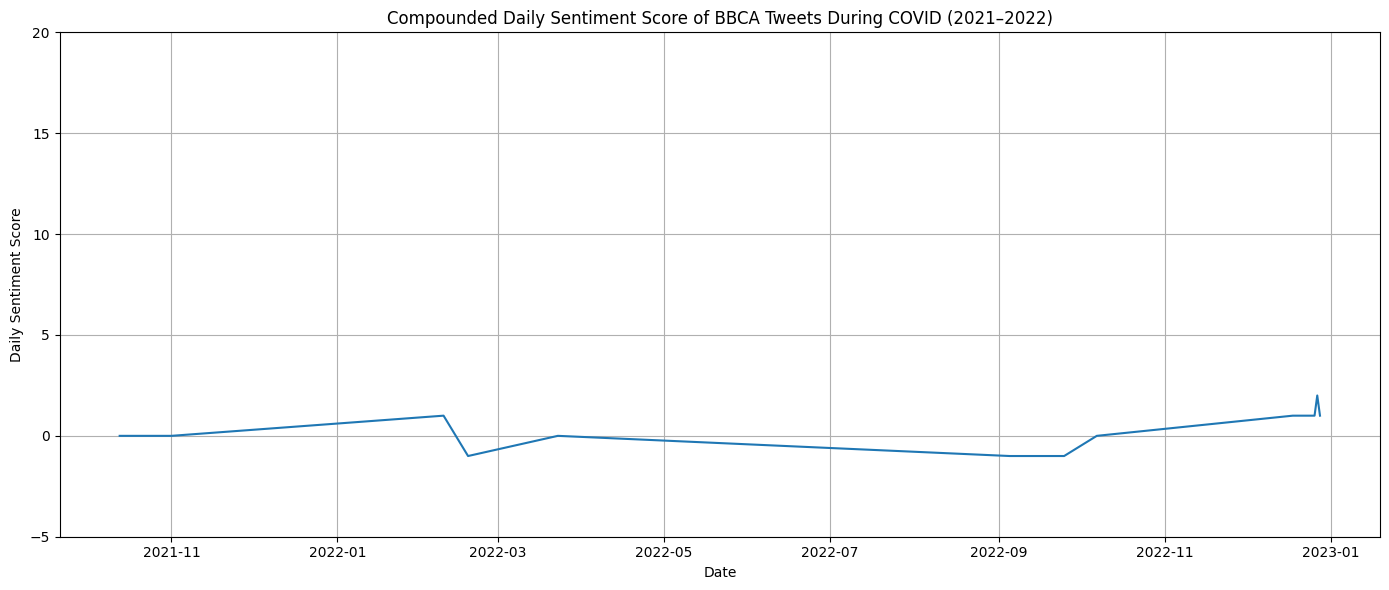

In [ ]:
sentiment_score_map = {"Positive": 1, "Neutral": 0, "Negative": -1}
df_bca_covid["sentiment_score"] = df_bca_covid["Sentiment"].map(sentiment_score_map)

df_bca_covid["date_only"] = pd.to_datetime(df_bca_covid["Tweet Date"]).dt.date
daily_score_covid = df_bca_covid.groupby("date_only")["sentiment_score"].sum()

plt.figure(figsize=(14,6))
daily_score_covid.plot()
plt.title("Compounded Daily Sentiment Score of BBCA Tweets During COVID (2021–2022)")
plt.xlabel("Date")
plt.ylabel("Daily Sentiment Score")
plt.grid(True)
plt.ylim(-5, 20)
plt.tight_layout()
plt.show()


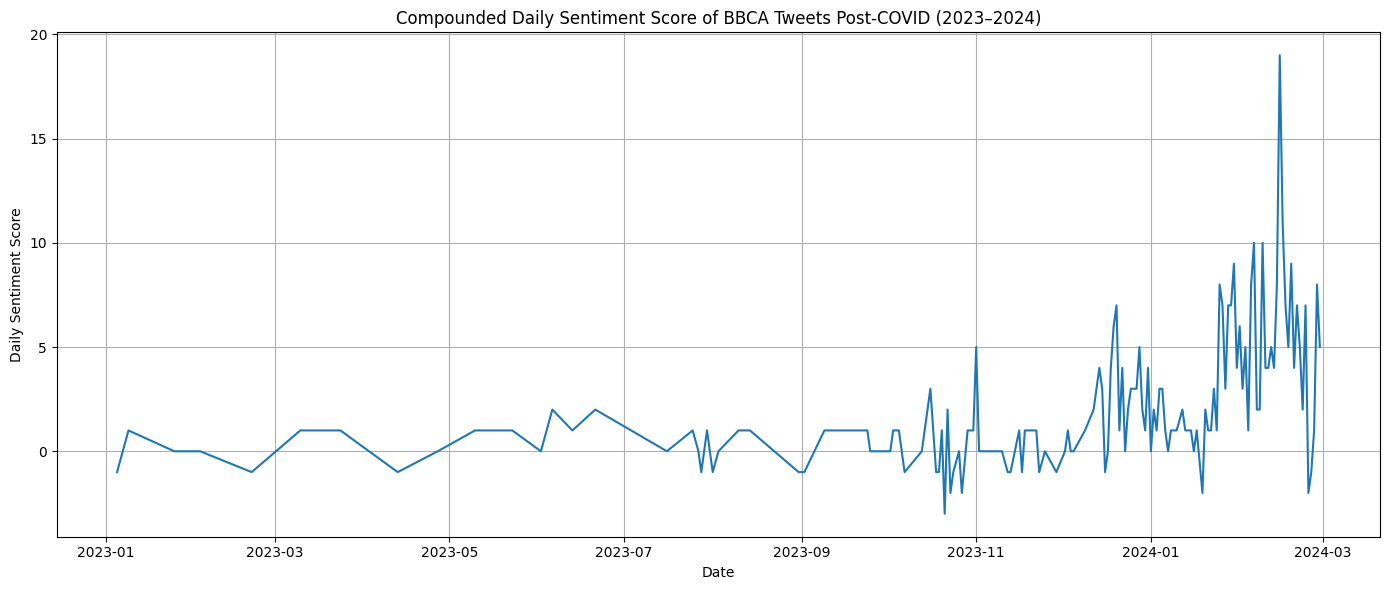

In [ ]:
df_bca_post["sentiment_score"] = df_bca_post["Sentiment"].map(sentiment_score_map)

df_bca_post["date_only"] = pd.to_datetime(df_bca_post["Tweet Date"]).dt.date
daily_score_post = df_bca_post.groupby("date_only")["sentiment_score"].sum()

plt.figure(figsize=(14,6))
daily_score_post.plot()
plt.title("Compounded Daily Sentiment Score of BBCA Tweets Post-COVID (2023–2024)")
plt.xlabel("Date")
plt.ylabel("Daily Sentiment Score")
plt.grid(True)
plt.tight_layout()
plt.show()



<ipython-input-33-3880933211>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("IDSMSA.csv", parse_dates=["Tweet Date"])
<ipython-input-33-3880933211>:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask_bca = df["Sentence"].str.contains(r"\b(BCA|BBCA)\b", case=False, regex=True)


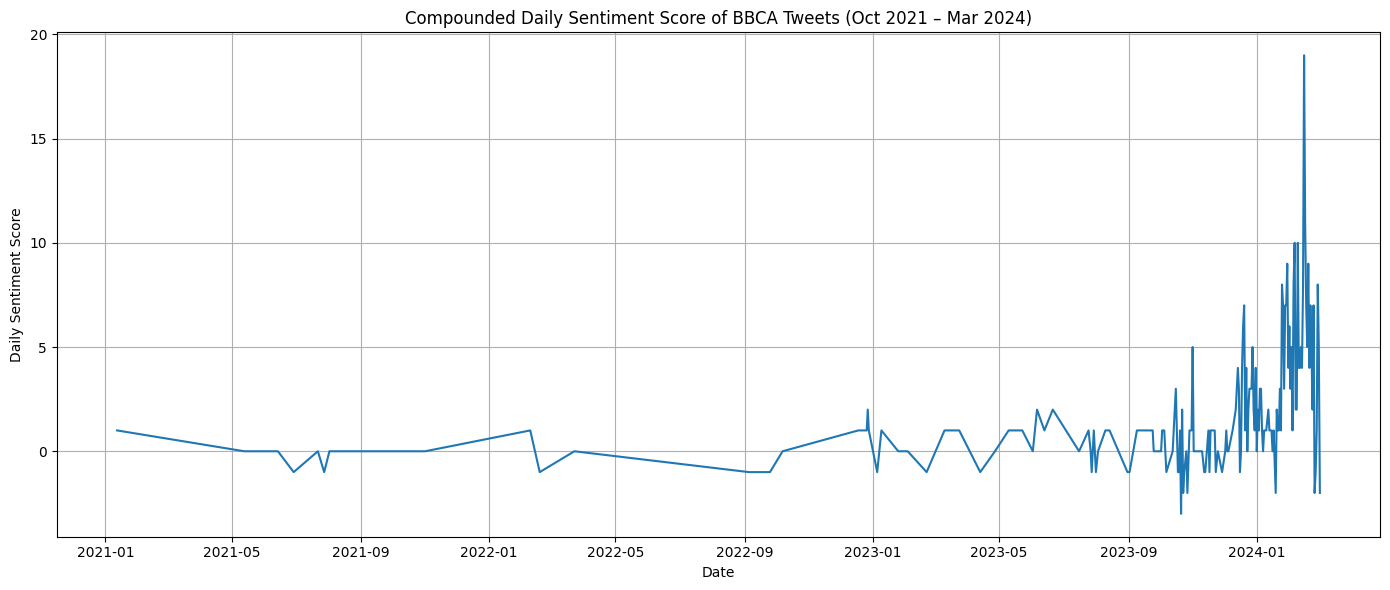

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("IDSMSA.csv", parse_dates=["Tweet Date"])

mask_bca = df["Sentence"].str.contains(r"\b(BCA|BBCA)\b", case=False, regex=True)
df_bca = df[mask_bca].copy()

sentiment_score_map = {"Positive": 1, "Neutral": 0, "Negative": -1}
df_bca["sentiment_score"] = df_bca["Sentiment"].map(sentiment_score_map)

df_bca["date_only"] = df_bca["Tweet Date"].dt.date
daily_score_bca = df_bca.groupby("date_only")["sentiment_score"].sum()

plt.figure(figsize=(14, 6))
daily_score_bca.plot()
plt.title("Compounded Daily Sentiment Score of BBCA Tweets (Oct 2021 – Mar 2024)")
plt.xlabel("Date")
plt.ylabel("Daily Sentiment Score")
plt.grid(True)
plt.tight_layout()
plt.show()


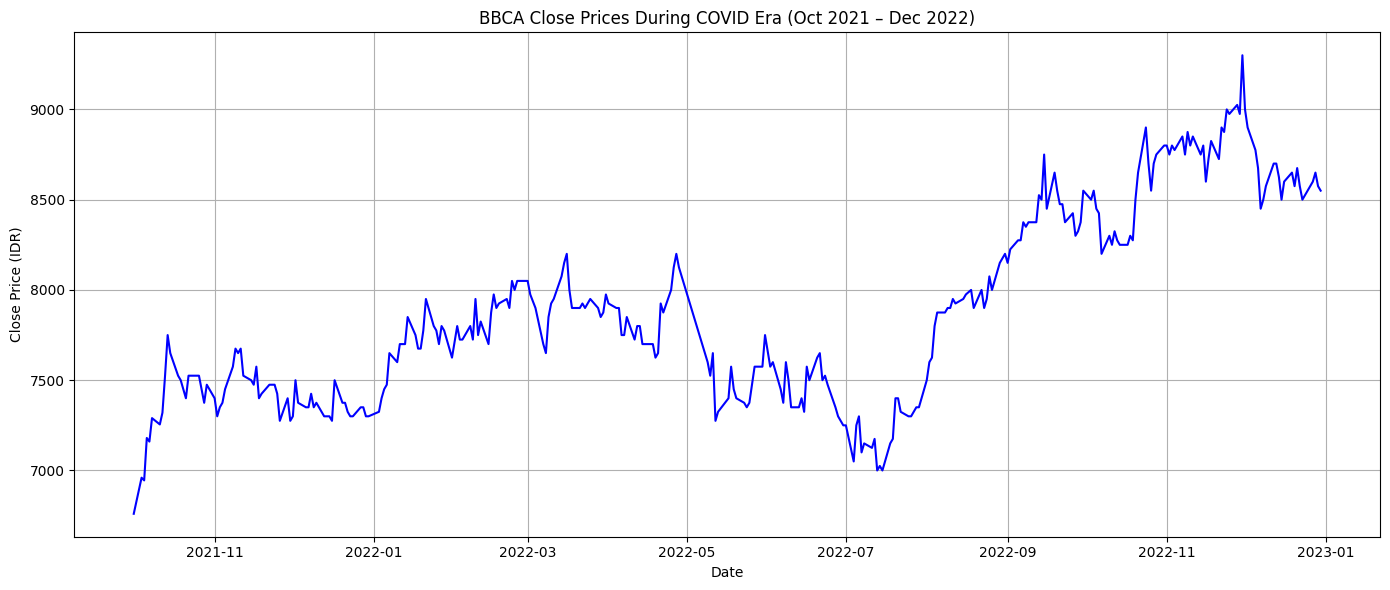

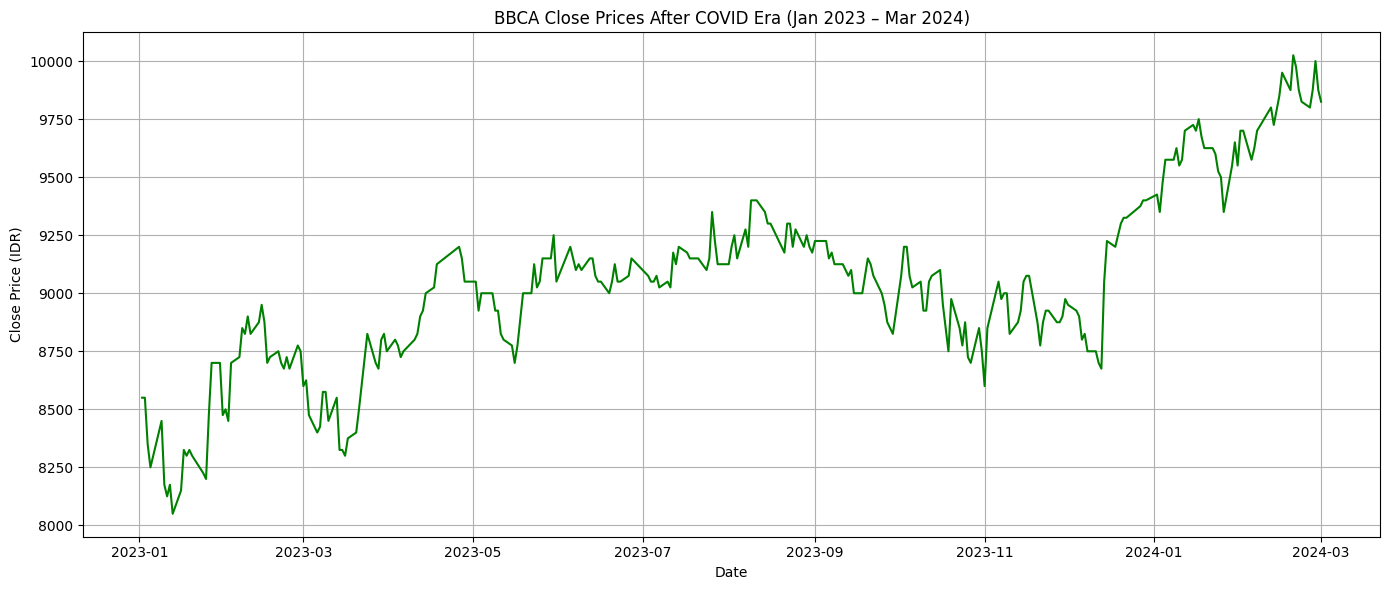

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_price = pd.read_csv("BBCA.JK.csv", parse_dates=["Date"])

mask_covid = (df_price["Date"] >= "2021-10-01") & (df_price["Date"] <= "2022-12-31")
df_covid_price = df_price[mask_covid]

mask_post_covid = (df_price["Date"] >= "2023-01-01") & (df_price["Date"] <= "2024-03-01")
df_post_covid_price = df_price[mask_post_covid]

plt.figure(figsize=(14, 6))
plt.plot(df_covid_price["Date"], df_covid_price["Close"], label="COVID Era Prices", color="blue")
plt.title("BBCA Close Prices During COVID Era (Oct 2021 – Dec 2022)")
plt.xlabel("Date")
plt.ylabel("Close Price (IDR)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(df_post_covid_price["Date"], df_post_covid_price["Close"], label="After COVID Era Prices", color="green")
plt.title("BBCA Close Prices After COVID Era (Jan 2023 – Mar 2024)")
plt.xlabel("Date")
plt.ylabel("Close Price (IDR)")
plt.grid(True)
plt.tight_layout()
plt.show()


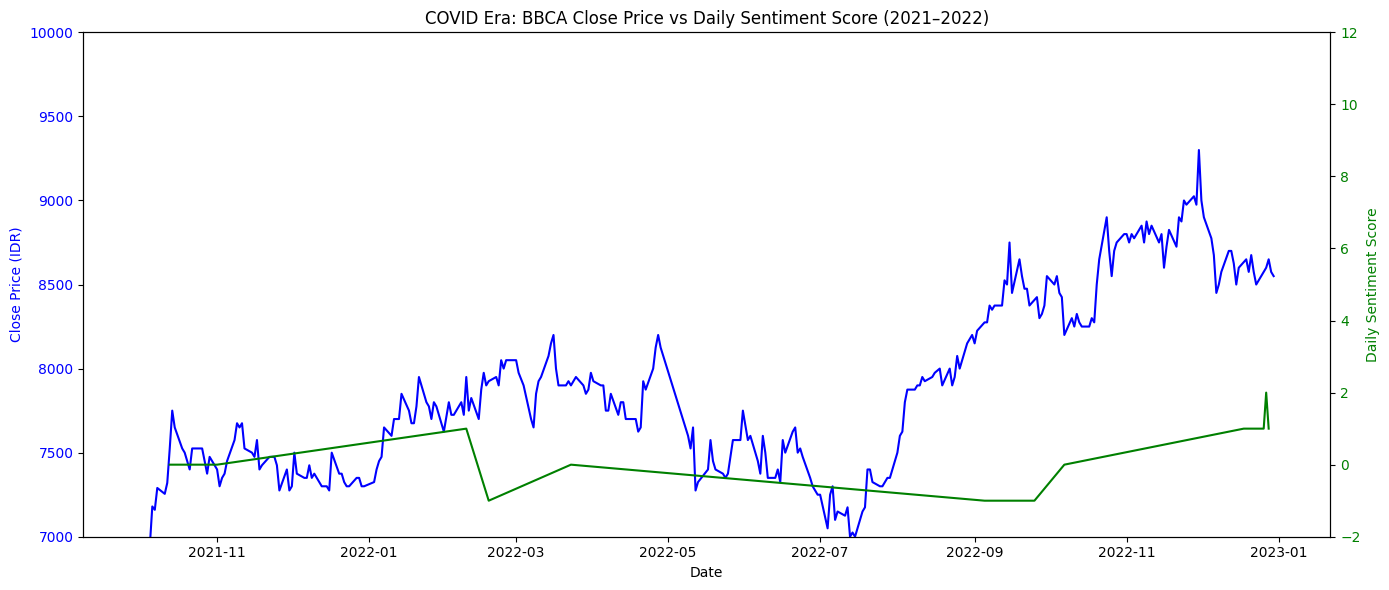

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(df_covid_price["Date"], df_covid_price["Close"], color="blue", label="Close Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("Close Price (IDR)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_ylim(7000, 10000)

ax2 = ax1.twinx()
ax2.plot(daily_score_covid, color="green", label="Sentiment Score")
ax2.set_ylabel("Daily Sentiment Score", color="green")
ax2.tick_params(axis='y', labelcolor="green")
ax2.set_ylim(-2, 12)

plt.title("COVID Era: BBCA Close Price vs Daily Sentiment Score (2021–2022)")
fig.tight_layout()
plt.show()




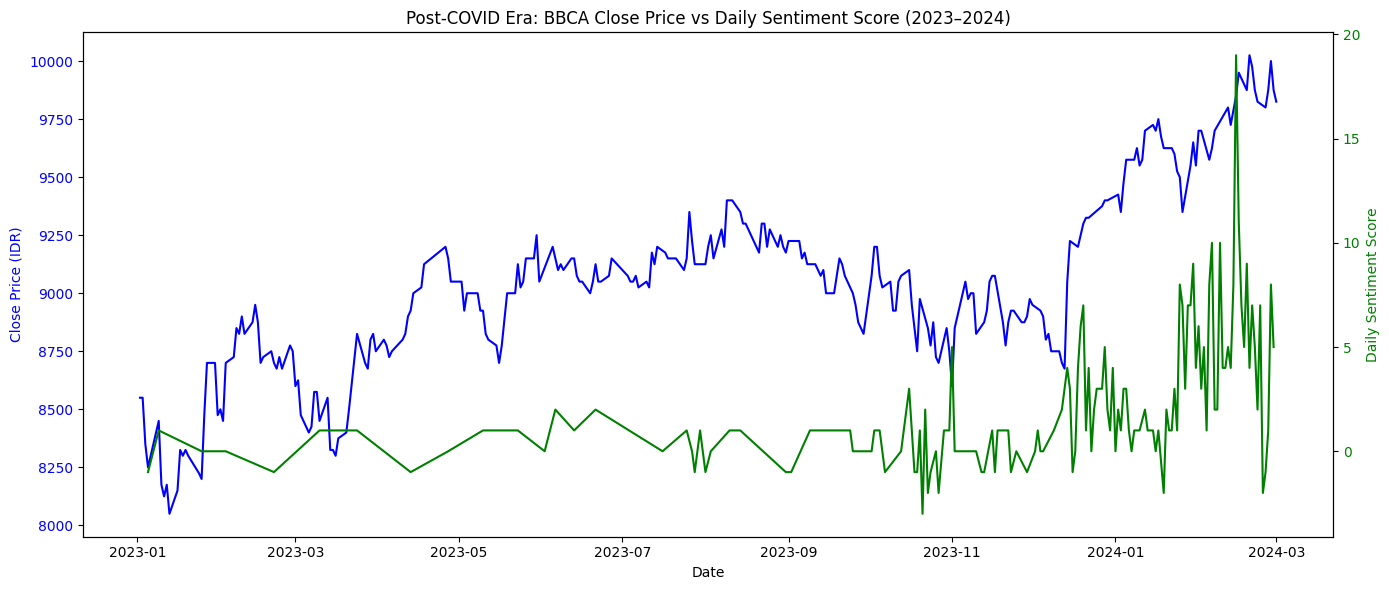

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(df_post_covid_price["Date"], df_post_covid_price["Close"], color="blue", label="Close Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("Close Price (IDR)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(daily_score_post, color="green", label="Sentiment Score")
ax2.set_ylabel("Daily Sentiment Score", color="green")
ax2.tick_params(axis='y', labelcolor="green")

plt.title("Post-COVID Era: BBCA Close Price vs Daily Sentiment Score (2023–2024)")
fig.tight_layout()
plt.show()


In [ ]:
df_bca_covid["date_only"] = pd.to_datetime(df_bca_covid["Tweet Date"]).dt.date
covid_sentiment_daily = df_bca_covid.groupby(["date_only", "Sentiment"]).size().unstack().fillna(0)

df_covid_price["date_only"] = df_covid_price["Date"].dt.date
merged_covid = pd.merge(df_covid_price[["date_only", "Close"]], covid_sentiment_daily, on="date_only", how="inner")

df_bca_post["date_only"] = pd.to_datetime(df_bca_post["Tweet Date"]).dt.date
post_sentiment_daily = df_bca_post.groupby(["date_only", "Sentiment"]).size().unstack().fillna(0)

df_post_covid_price["date_only"] = df_post_covid_price["Date"].dt.date
merged_post = pd.merge(df_post_covid_price[["date_only", "Close"]], post_sentiment_daily, on="date_only", how="inner")


<ipython-input-38-330591054>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_price["date_only"] = df_covid_price["Date"].dt.date
<ipython-input-38-330591054>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_post_covid_price["date_only"] = df_post_covid_price["Date"].dt.date


<ipython-input-39-61865930>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_price["date_only"] = df_covid_price["Date"].dt.date
<ipython-input-39-61865930>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_post_covid_price["date_only"] = df_post_covid_price["Date"].dt.date


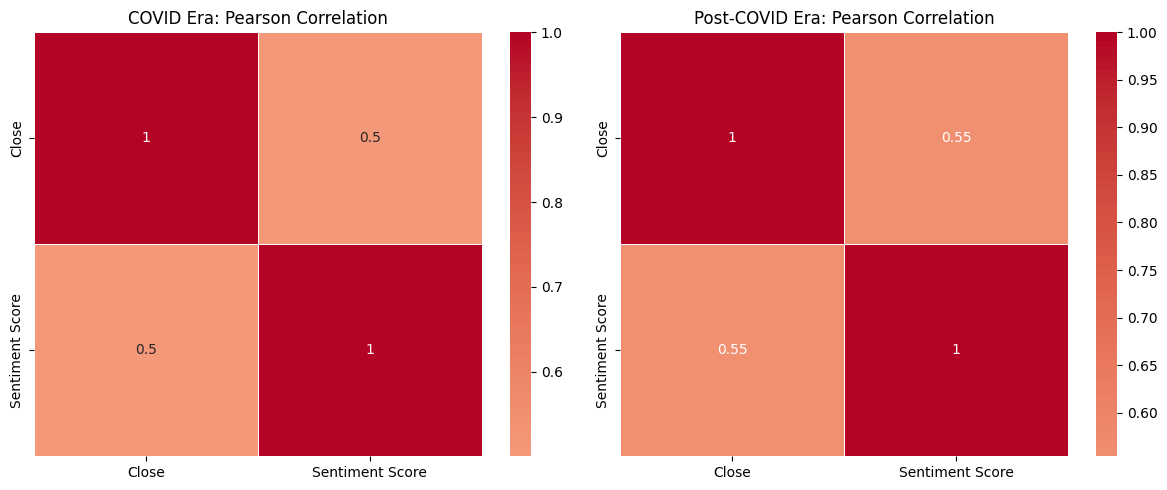

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_covid_price["date_only"] = df_covid_price["Date"].dt.date
merged_covid = pd.merge(
    df_covid_price[["date_only", "Close"]],
    daily_score_covid.rename("Sentiment Score"),
    on="date_only"
)

correlation_covid = merged_covid[["Close", "Sentiment Score"]].corr(method='pearson')

df_post_covid_price["date_only"] = df_post_covid_price["Date"].dt.date
merged_post = pd.merge(
    df_post_covid_price[["date_only", "Close"]],
    daily_score_post.rename("Sentiment Score"),
    on="date_only"
)

correlation_post = merged_post[["Close", "Sentiment Score"]].corr(method='pearson')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(correlation_covid, annot=True, cmap='coolwarm', center=0,
            linewidths=0.5, ax=axes[0])
axes[0].set_title("COVID Era: Pearson Correlation")

sns.heatmap(correlation_post, annot=True, cmap='coolwarm', center=0,
            linewidths=0.5, ax=axes[1])
axes[1].set_title("Post-COVID Era: Pearson Correlation")

plt.tight_layout()
plt.show()



<ipython-input-2-3559701628>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, x='Sentiment', order=filtered_df['Sentiment'].value_counts().index, palette='Set2')


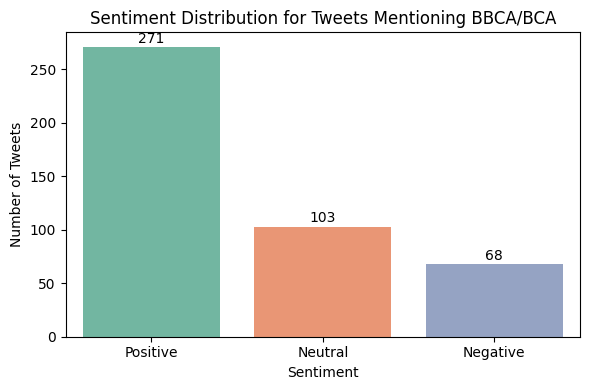

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = df[df['Sentence'].str.contains(r'\bBBCA\b', case=False, na=False)]

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=filtered_df, x='Sentiment', order=filtered_df['Sentiment'].value_counts().index, palette='Set2')

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,
        int(height),
        ha='center', va='bottom'
    )

plt.title('Sentiment Distribution for Tweets Mentioning BBCA/BCA')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
from scipy.stats import pearsonr

df_sent = pd.read_csv("IDSMSA.csv", parse_dates=["Tweet Date"])

df_sent = df_sent[df_sent["Sentence"].str.contains(r"\b(BCA|BBCA)\b", case=False, regex=True)].copy()

sentiment_map = {"Positive": 2, "Neutral": 1, "Negative": 0}
df_sent["score"] = df_sent["Sentiment"].map(sentiment_map)
df_sent["date_only"] = df_sent["Tweet Date"].dt.date

daily_sentiment = df_sent.groupby("date_only")["score"].sum().rename("sentiment_score").reset_index()

df_stock = pd.read_csv("BBCA.JK.csv", parse_dates=["Date"])
df_stock["date_only"] = df_stock["Date"].dt.date

df_stock = df_stock[["date_only", "Close"]]

mask_covid = (daily_sentiment["date_only"] >= pd.to_datetime("2021-10-01").date()) & \
             (daily_sentiment["date_only"] <= pd.to_datetime("2022-12-31").date())
covid_sent = daily_sentiment[mask_covid]

mask_covid_price = (df_stock["date_only"] >= pd.to_datetime("2021-10-01").date()) & \
                   (df_stock["date_only"] <= pd.to_datetime("2022-12-31").date())
covid_price = df_stock[mask_covid_price]

mask_post = (daily_sentiment["date_only"] >= pd.to_datetime("2023-01-01").date()) & \
            (daily_sentiment["date_only"] <= pd.to_datetime("2024-03-31").date())
post_sent = daily_sentiment[mask_post]

mask_post_price = (df_stock["date_only"] >= pd.to_datetime("2023-01-01").date()) & \
                  (df_stock["date_only"] <= pd.to_datetime("2024-03-31").date())
post_price = df_stock[mask_post_price]

def merge_and_align(sent_df, price_df):
    merged = pd.merge(sent_df, price_df, on="date_only").sort_values("date_only")
    merged.set_index("date_only", inplace=True)
    return merged

covid_data = merge_and_align(covid_sent, covid_price)
post_data = merge_and_align(post_sent, post_price)

def lag_correlation(df, max_lag=7):
    print("Lag Correlations:")
    for lag in range(1, max_lag + 1):
        shifted = df["sentiment_score"].shift(lag)
        corr, _ = pearsonr(shifted[lag:], df["Close"][lag:])
        print(f"  Lag {lag} days: Pearson r = {corr:.4f}")

print("\n=== COVID ERA ===")
lag_correlation(covid_data)

print("\n=== POST-COVID ERA ===")
lag_correlation(post_data)

def run_granger(df, maxlag=7):
    df = df.dropna()
    print("\n[Sentiment ➜ Price]")
    grangercausalitytests(df[["Close", "sentiment_score"]], maxlag=2, verbose=True)

    print("\n[Price ➜ Sentiment]")
    grangercausalitytests(df[["sentiment_score", "Close"]], maxlag=2, verbose=True)

print("\n=== GRANGER TEST (COVID ERA) ===")
run_granger(covid_data)

print("\n=== GRANGER TEST (POST-COVID ERA) ===")
run_granger(post_data)


<ipython-input-40-1618516384>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sent = pd.read_csv("IDSMSA.csv", parse_dates=["Tweet Date"])



=== COVID ERA ===
Lag Correlations:
  Lag 1 days: Pearson r = 0.4751
  Lag 2 days: Pearson r = -0.1782
  Lag 3 days: Pearson r = -0.1692
  Lag 4 days: Pearson r = -0.5950
  Lag 5 days: Pearson r = -0.0428
  Lag 6 days: Pearson r = -0.0988
  Lag 7 days: Pearson r = 0.9449

=== POST-COVID ERA ===
Lag Correlations:
  Lag 1 days: Pearson r = 0.6268
  Lag 2 days: Pearson r = 0.6469
  Lag 3 days: Pearson r = 0.6461
  Lag 4 days: Pearson r = 0.6425
  Lag 5 days: Pearson r = 0.6554
  Lag 6 days: Pearson r = 0.6289
  Lag 7 days: Pearson r = 0.6195

=== GRANGER TEST (COVID ERA) ===

[Sentiment ➜ Price]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0717  , p=0.7978  , df_denom=6, df_num=1
ssr based chi2 test:   chi2=0.1076  , p=0.7429  , df=1
likelihood ratio test: chi2=0.1070  , p=0.7436  , df=1
parameter F test:         F=0.0717  , p=0.7978  , df_denom=6, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.2304  , p=0.0855  , df_de

<ipython-input-40-1618516384>:14: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_sent = df_sent[df_sent["Sentence"].str.contains(r"\b(BCA|BBCA)\b", case=False, regex=True)].copy()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
